**Task#2 Iris Flower Classification**

**Importing Libraries**

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [203]:
train=pd.read_csv("/content/iris.data")
train.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


**Lets assign column names**

In [204]:
# Reading the data with column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
train = pd.read_csv("/content/iris.data", names=column_names)

train.head(150)



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [205]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [206]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data Visualization**

<Axes: xlabel='species', ylabel='sepal_length'>

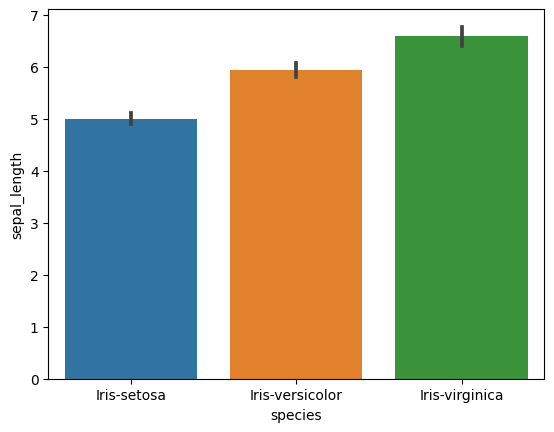

In [207]:
sns.barplot(data=train,y="sepal_length",x="species")


<Axes: xlabel='species', ylabel='sepal_width'>

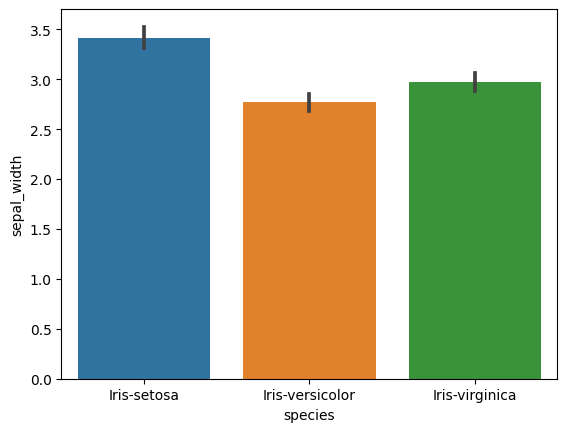

In [208]:
sns.barplot(data=train,y="sepal_width",x="species")

<Axes: xlabel='species', ylabel='petal_length'>

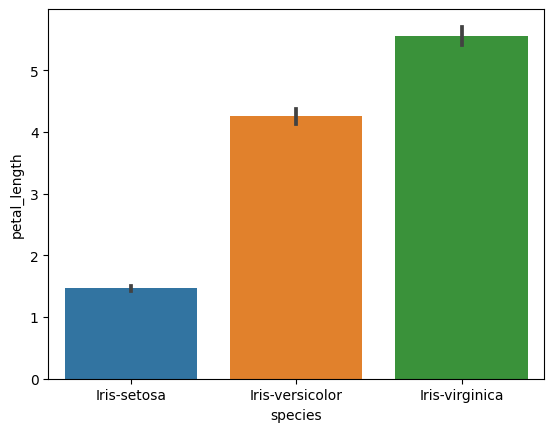

In [209]:
sns.barplot(data=train,y="petal_length",x="species")


<Axes: xlabel='species', ylabel='petal_width'>

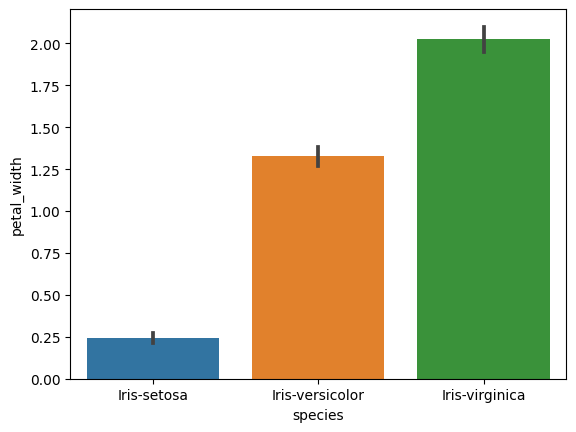

In [210]:
sns.barplot(data=train,y="petal_width",x="species")

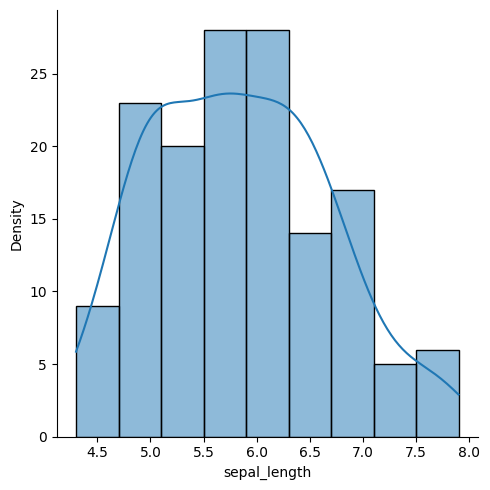

In [211]:
sns.displot(train['sepal_length'], kde=True)
plt.xlabel('sepal_length')
plt.ylabel('Density')
plt.show()

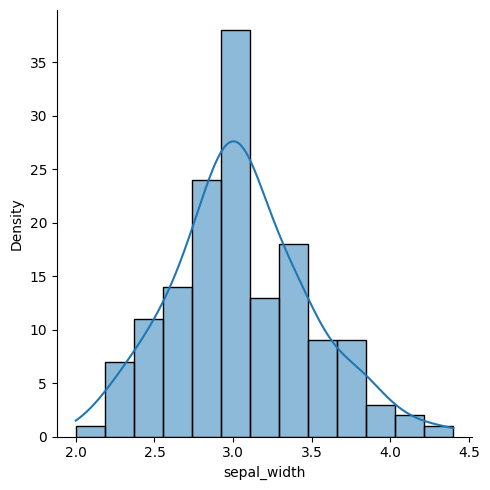

In [212]:
sns.displot(train['sepal_width'], kde=True)
plt.xlabel('sepal_width')
plt.ylabel('Density')
plt.show()

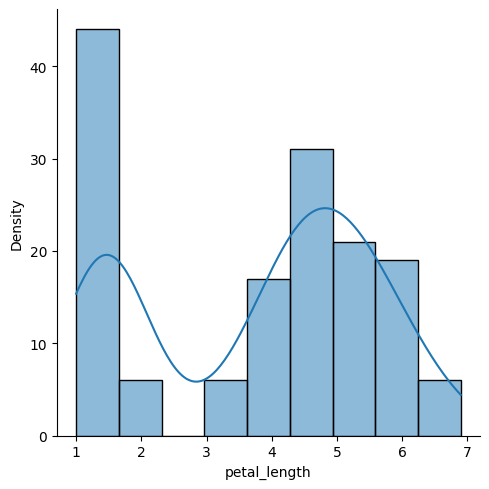

In [213]:
sns.displot(train['petal_length'], kde=True)
plt.xlabel('petal_length')
plt.ylabel('Density')
plt.show()

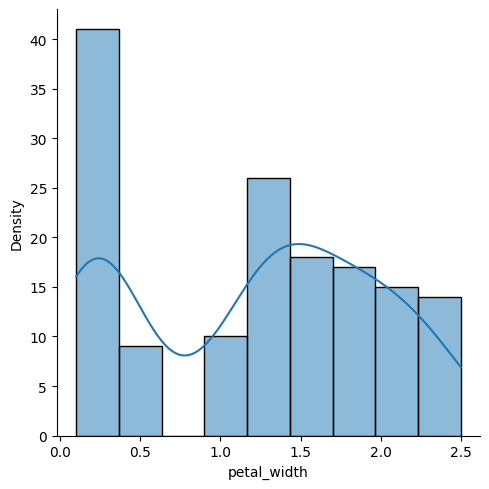

In [214]:
sns.displot(train['petal_width'], kde=True)
plt.xlabel('petal_width')
plt.ylabel('Density')
plt.show()

**Data Preprocessing**

In [215]:
train.isnull().sum()



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [216]:
from sklearn import preprocessing
features = train.drop('species', axis=1)  # Exclude the 'species' column from the features

# Apply MinMaxScaler to the features
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
norm_features = scaler.fit_transform(features)

# Create a DataFrame with the normalized features
norm_df = pd.DataFrame(norm_features, columns=features.columns)

# Add the 'species' column back to the DataFrame
norm_df['species'] = train['species']

# Update the 'train' DataFrame with the normalized features
train = norm_df
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


**Label Encoding**

In [217]:
from sklearn.preprocessing import LabelEncoder
cols =['species']
le=LabelEncoder()
for col in cols:
    train[col]=le.fit_transform(train[col])
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


**Train-Test Split**

In [218]:
X=train.drop(['species'],axis=1)
y=train['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


**Model Training**

In [219]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import joblib
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=661)
    model.fit(X_train,y_train)
    print('Accuracy:',model.score(X_test,y_test))
    score=cross_val_score(model, X, y,cv=5)
    print(score)
    print('CV Score:', np.mean(score))


 **Logistic Regression**

In [220]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Accuracy: 0.9666666666666667
[0.83333333 0.96666667 0.93333333 0.9        1.        ]
CV Score: 0.9266666666666665
Mean Squared Error:  0.07333333333333333
R-squared:  0.89


**Decision Tree Classifier**

In [221]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Accuracy: 1.0
[0.96666667 0.96666667 0.9        1.         1.        ]
CV Score: 0.9666666666666668
Mean Squared Error:  0.0
R-squared:  1.0


**Random Forest Classifier**

In [222]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
joblib.dump(model, 'Saved_Model.pkl')

Accuracy: 1.0
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
CV Score: 0.96
Mean Squared Error:  0.0
R-squared:  1.0


['Saved_Model.pkl']

**SVM Classifier**

In [223]:
from sklearn.svm import SVC
model = SVC()
classify(model,X,y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Accuracy: 1.0
[0.96666667 1.         0.93333333 0.9        1.        ]
CV Score: 0.9600000000000002
Mean Squared Error:  0.02
R-squared:  0.97


**Predecting Some Random Data**

In [224]:
model = joblib.load('Saved_Model.pkl')
new_data = np.random.rand(10, X.shape[1])  # Assuming 10 samples with the same number of features as your original data

# Make predictions on the new data
predictions = model.predict(new_data)

# Convert predictions back to categorical form using inverse transform
inverse_transform_predictions = le.inverse_transform(predictions)

# Create a DataFrame to display the data and results in a table
data_df = pd.DataFrame(new_data, columns=X.columns)
data_df['Predictions'] = inverse_transform_predictions  # Add predictions to the DataFrame

# Display the data and results in a table
print("Data and Predictions:")
print(data_df)


Data and Predictions:
   sepal_length  sepal_width  petal_length  petal_width      Predictions
0      0.244180     0.301226      0.648950     0.558022  Iris-versicolor
1      0.218030     0.321789      0.364688     0.089712      Iris-setosa
2      0.209962     0.412483      0.701936     0.299213  Iris-versicolor
3      0.608786     0.755190      0.529005     0.643344  Iris-versicolor
4      0.134950     0.894721      0.712034     0.395108   Iris-virginica
5      0.610292     0.788453      0.609975     0.919563   Iris-virginica
6      0.873212     0.522079      0.586394     0.877498   Iris-virginica
7      0.265454     0.079288      0.867405     0.535407   Iris-virginica
8      0.751546     0.699130      0.098340     0.206534      Iris-setosa
9      0.998394     0.423027      0.608641     0.012113      Iris-setosa
